<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/sparse_NN_ohscal_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1ToGVCjk07kf_z0f2_ApmjduwkI0eXNkl'
downloaded = drive.CreateFile({'id': file_id})

In [0]:
downloaded.GetContentFile('ohscal.wc.csv')

In [4]:
df_train=pd.read_csv('ohscal.wc.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')
df_train.head()

The train set contain 11161 examples
The train set contain 11466 features


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,1,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.11370,0.11371,0.11372,0.11373,0.11374,0.11375,0.11376,0.11377,0.11378,0.11379,0.11380,0.11381,0.11382,0.11383,0.11384,0.11385,0.11386,0.11387,0.11388,0.11389,0.11390,0.11391,0.11392,0.11393,0.11394,0.11395,0.11396,0.11397,0.11398,0.11399,0.11400,0.11401,0.11402,0.11403,0.11404,0.11405,0.11406,0.11407,0.11408,DNA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Carcinoma
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Carcinoma
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Carcinoma
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tomography
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tomography


In [0]:
X_train = df_train.drop('DNA', axis = 1)#drops the column type from the dataframe
y_train = df_train['DNA']

['Carcinoma' 'Tomography' 'In-Vitro' 'Antibodies' 'Risk-Factors'
 'Prognosis' 'Receptors' 'DNA' 'Pregnancy' 'Molecular-Sequence-Data']


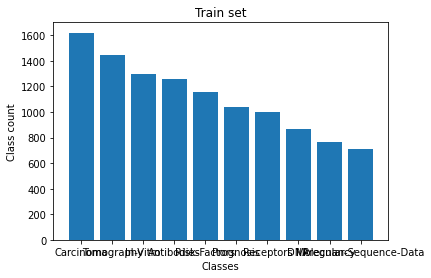

In [9]:
classes = y_train.unique()#no. of classes 
print(y_train.unique())
values = y_train.value_counts()#occurrence of each class

plt.bar(classes, values)
plt.title('Train set')
plt.xlabel('Classes')
plt.ylabel('Class count')
plt.show()

In [10]:
X_train.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,1,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.11369,0.11370,0.11371,0.11372,0.11373,0.11374,0.11375,0.11376,0.11377,0.11378,0.11379,0.11380,0.11381,0.11382,0.11383,0.11384,0.11385,0.11386,0.11387,0.11388,0.11389,0.11390,0.11391,0.11392,0.11393,0.11394,0.11395,0.11396,0.11397,0.11398,0.11399,0.11400,0.11401,0.11402,0.11403,0.11404,0.11405,0.11406,0.11407,0.11408
count,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,...,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.00000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000
mean,0.012454,0.000358,0.001434,0.004749,0.000538,0.012544,0.000717,0.000627,0.000538,0.000717,0.001165,0.001434,0.000896,0.000627,0.005376,0.006182,0.033689,0.008870,0.062091,0.000627,0.000986,1.821790,0.008153,0.001075,0.001434,0.000358,0.003494,0.004301,0.000896,0.000896,0.000269,0.011558,0.005017,0.029030,0.000896,0.006899,0.003942,0.006451,0.002061,0.002957,...,0.003942,0.015052,0.000627,0.000538,0.003942,0.000806,0.003494,0.001971,0.001165,0.001434,0.000448,0.015859,0.000627,0.000538,0.000986,0.004390,0.000627,0.000448,0.062091,0.000269,0.001254,0.055371,0.000627,0.000896,0.001344,0.000896,0.001075,0.000448,0.000986,0.000538,0.00439,0.000269,0.004749,0.001075,0.186094,0.001434,0.002509,0.001882,0.000448,0.029567
std,0.185802,0.023184,0.051828,0.138071,0.029929,0.177660,0.035411,0.049183,0.023181,0.048262,0.034110,0.117462,0.032779,0.025037,0.124029,0.156855,0.287950,0.145457,0.333867,0.025037,0.045387,4.105972,0.142387,0.081423,0.090784,0.023184,0.147519,0.120406,0.040151,0.076897,0.016393,0.189204,0.076739,0.377764,0.042324,0.200015,0.146594,0.111818,0.079736,0.104084,...,0.068147,0.123955,0.028391,0.029929,0.118165,0.031385,0.081904,0.044356,0.062062,0.058335,0.021162,0.156746,0.049183,0.023181,0.034116,0.089194,0.031389,0.028395,0.370988,0.016393,0.087775,0.624455,0.028391,0.042324,0.052687,0.055189,0.050078,0.025041,0.045387,0.026769,0.13279,0.016393,0.141278,0.048255,0.605862,0.056778,0.050027,0.067575,0.021162,0.197258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
Y_train = np_utils.to_categorical(encoded_Y)
Y_train.shape

(11161, 10)

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=11465, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=100, verbose=2)
kfold = KFold(n_splits=5, shuffle=True)

In [24]:
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20
 - 2s - loss: 1.5424 - accuracy: 0.5727
Epoch 2/20
 - 2s - loss: 0.7610 - accuracy: 0.8330
Epoch 3/20
 - 2s - loss: 0.4951 - accuracy: 0.8953
Epoch 4/20
 - 2s - loss: 0.3475 - accuracy: 0.9343
Epoch 5/20
 - 2s - loss: 0.2539 - accuracy: 0.9579
Epoch 6/20
 - 2s - loss: 0.1885 - accuracy: 0.9726
Epoch 7/20
 - 2s - loss: 0.1423 - accuracy: 0.9832
Epoch 8/20
 - 2s - loss: 0.1091 - accuracy: 0.9905
Epoch 9/20
 - 2s - loss: 0.0848 - accuracy: 0.9951
Epoch 10/20
 - 2s - loss: 0.0669 - accuracy: 0.9968
Epoch 11/20
 - 2s - loss: 0.0535 - accuracy: 0.9983
Epoch 12/20
 - 2s - loss: 0.0433 - accuracy: 0.9989
Epoch 13/20
 - 2s - loss: 0.0355 - accuracy: 0.9994
Epoch 14/20
 - 2s - loss: 0.0294 - accuracy: 0.9998
Epoch 15/20
 - 2s - loss: 0.0247 - accuracy: 0.9998
Epoch 16/20
 - 2s - loss: 0.0209 - accuracy: 0.9999
Epoch 17/20
 - 2s - loss: 0.0179 - accuracy: 0.9999
Epoch 18/20
 - 2s - loss: 0.0154 - accuracy: 0.9999
Epoch 19/20
 - 2s - loss: 0.0135 - accuracy: 0.9999
Epoch 20/20
 - 2s - l